In [1]:
from init import config

# 短期曲線、長期曲線
時間の幅を変化させて比較。

- 気付き
    - bitflyerの曲線は、それまでの曲線は更新されていない。  
    最新の点を何らかの処理で求めて、それを繋げている。  
    おそらく、時間で区切った累計の値になる。
    - → 最新時間n分での平均をとる
    
- 結果
    - 大体似てる。ロジックの本質は変わらないよう。
    - あとイジるとすれば、時間で重みづけするか、中央値や階級データでの最頻値を見るか。。

In [2]:
# データ取得
import db
SAMPLING_SEC_BY = 60*100
ticker = db.df.read_ticker(sec_by=SAMPLING_SEC_BY)

2017-12-27 09:27:52,875 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2017-12-27 09:27:52,877 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:27:52,885 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2017-12-27 09:27:52,887 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:27:52,921 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8' and `Collation` = 'utf8_bin'
2017-12-27 09:27:52,928 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:27:52,940 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2017-12-27 09:27:52,946 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:27:52,956 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2017-12-27 09:27:52,957 INFO sqlalchemy.engine.base.Engine ()
2017-12-27 09:27:52,962 INFO sqlalchemy.engine.base.Engine SELECT CAST('test collated returns' AS CHAR CHARACTER SET utf8) COLLATE utf8_bin AS anon_1
2017-12-27 09

/usr/local/lib/python3.5/dist-packages/sqlalchemy/dialects/mysql/base.py:1576: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


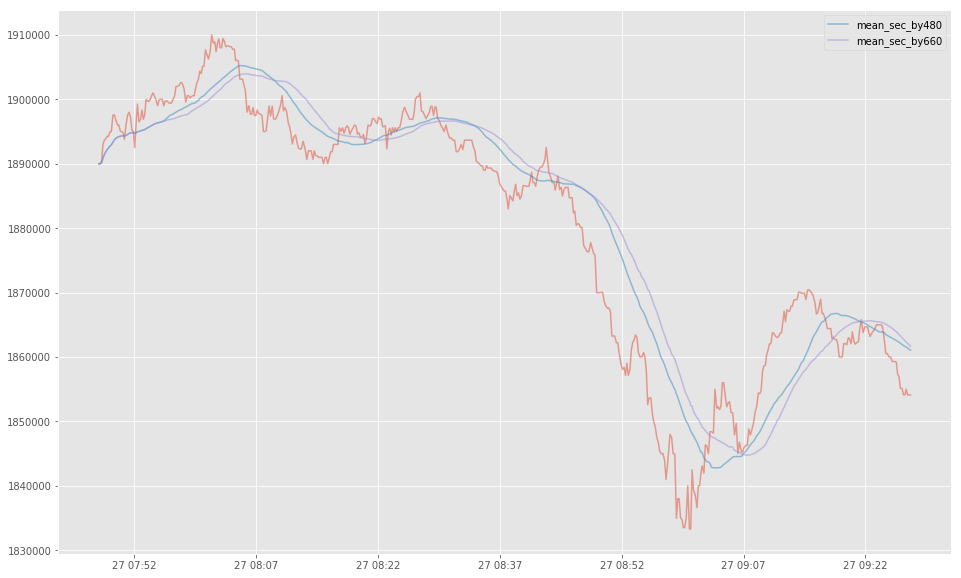

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
from plotter.plot import plt, set_figure
set_figure((16,10))

def gen_feature_ltp(ticker):
    ltp = ticker["ltp"]
    x_time = [time for time in ltp.index]
    x = np.array([i.timestamp() for i in x_time])
    y = ltp.tolist()
    return x_time, x, y

def raw_plot(ticker):
    x_time, x, y = gen_feature_ltp(ticker)
    plt.plot(x_time, y, "-", alpha=0.5)

def mean_plot(ticker, sec_by):
    x_time, x, y = gen_feature_ltp(ticker)
    means_y = []
    for i in range(1,len(x)+1):
        x_ = x_time[:i]
        y_ = y[:i]
        # 時間で抽出
        if sec_by is not None:
            df_ = pd.DataFrame(y_, x_)
            end_by = df_.index.max() - datetime.timedelta(seconds=sec_by)
            end_by = end_by.strftime('%Y-%m-%d %H:%M:%S')
            df_ = df_.loc[end_by:]
            y_mean = df_[0].mean()
        else:
            y_mean = y.mean()
        means_y.append(y_mean)
    plt.plot(x_time, means_y, "-", alpha=0.5, label="mean_sec_by{}".format(sec_by))

raw_plot(ticker)

# 目件で、暫定的に決定。
# 長期曲線は 11分平均
# 短期曲線は 8分平均
mean_plot(ticker, 60*8)
mean_plot(ticker, 60*11)
plt.legend()